# Strategy 5 - Simple RNN for Price Prediction

Dans ce notebook, nous allons implémenter et tester une stratégie basée sur un RNN simple pour la prédiction des prix. Nous utiliserons la même structure de validation croisée que dans la stratégie 4.

In [1]:
import sys
import os

# Get the parent directory of the "notebook" folder
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Add it to the Python path
sys.path.append(project_root)

In [2]:
from strategies.simple_rnn import SimpleRNNStrategy
from utils.backtest import Backtest
from utils.data_handler import DataHandler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
data_handler = DataHandler(ticker='AAPL', start_date='2010-01-01', end_date='2022-01-01')
data = data_handler.fetch_data()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed



In [7]:
# Création et entraînement de la stratégie RNN
rnn_strategy = SimpleRNNStrategy(lookback=30, n_splits=5, epochs=30)
signals = rnn_strategy.generate_signals(data)

# Affichage des scores de validation croisée
print("Cross-validation MSE scores:")
for i, score in enumerate(rnn_strategy.cv_scores, 1):
    print(f"Fold {i}: {score:.6f}")
print(f"\nMean MSE: {np.mean(rnn_strategy.cv_scores):.6f}")
print(f"Std MSE: {np.std(rnn_strategy.cv_scores):.6f}")

c:\Users\lisam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Cross-validation MSE scores:
Fold 1: 0.000009
Fold 2: 0.000010
Fold 3: 0.000017
Fold 4: 0.000065
Fold 5: 0.000665

Mean MSE: 0.000153
Std MSE: 0.000257


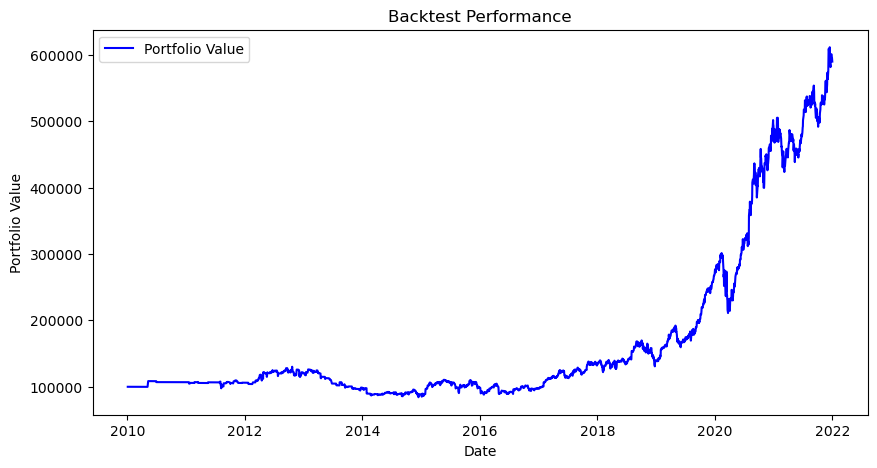

Final Value: 589593.6971
Return: 4.8959
Sharpe Ratio: 0.7864
Max Drawdown: -0.3524


In [8]:
# Backtest de la stratégie
backtest = Backtest(data, rnn_strategy)
results = backtest.run()

# Affichage des résultats
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")

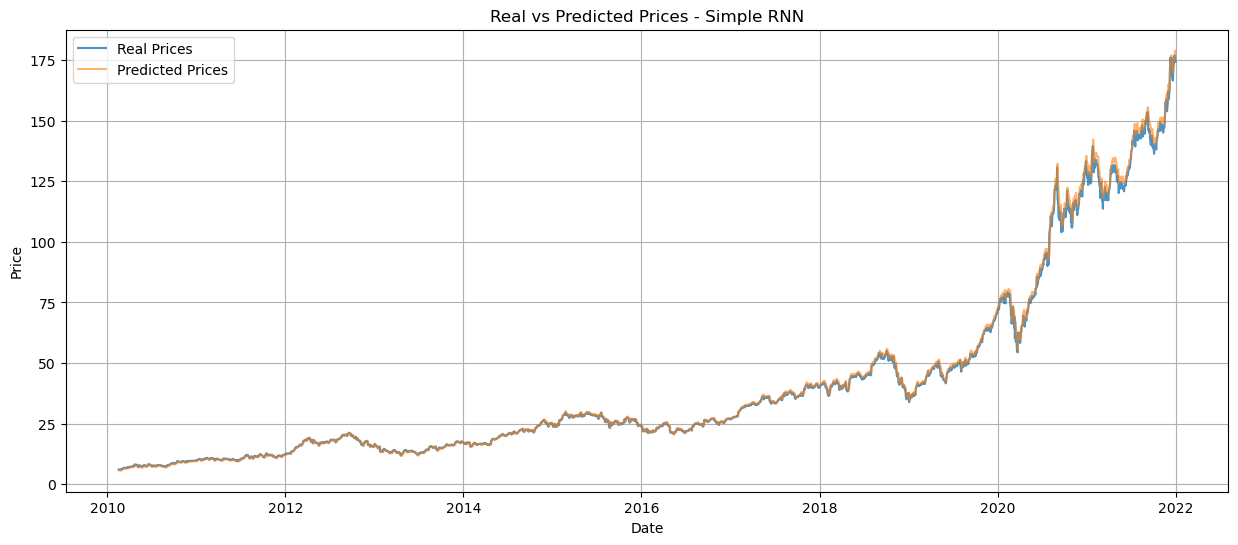

Mean Squared Error: 2.23
R² Score: 0.9984


In [10]:
# Obtenir les prédictions et les prix réels
X, y = rnn_strategy.prepare_data(data)
predictions = rnn_strategy.generate_prediction(X)

# Inverse transform des données scaled
predictions = rnn_strategy.scaler_X.inverse_transform(predictions)
y_actual = rnn_strategy.scaler_X.inverse_transform(y)

# Création d'un DataFrame pour la visualisation
prediction_index = data.index[rnn_strategy.lookback:]
df_comparison = pd.DataFrame({
    'Actual': y_actual.flatten(),
    'Predicted': predictions.flatten()
}, index=prediction_index)

# Visualisation
plt.figure(figsize=(15, 6))
plt.plot(df_comparison.index, df_comparison['Actual'], label='Real Prices', alpha=0.8)
plt.plot(df_comparison.index, df_comparison['Predicted'], label='Predicted Prices', alpha=0.6)
plt.title('Real vs Predicted Prices - Simple RNN')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calcul des métriques
mse = mean_squared_error(df_comparison['Actual'], df_comparison['Predicted'])
r2 = r2_score(df_comparison['Actual'], df_comparison['Predicted'])

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.4f}')

## Analyse des résultats

Comparaison avec la stratégie basée sur les indicateurs techniques :
1. Performance globale
2. Stabilité des prédictions (std des CV scores)
3. Ratio de Sharpe et drawdown maximum

Points clés à noter :
- Le RNN simple utilise uniquement les prix de clôture passés
- La fenêtre glissante de 30 jours capture les dépendances temporelles
- Les signaux sont générés en comparant les prédictions aux prix actuels